In [56]:
import sys
sys.path.append('/Users/sdbykov/work/self-supervised-halos/')

In [57]:
import requests
import numpy as np
import h5py
from tqdm import tqdm
import os
from glob import glob

%matplotlib inline

from utils.data.tng_query import get, HaloInfo
from utils.utils import data_path
data_path = data_path+'tng/'

In [58]:
#downloaded_halos = os.listdir(data_path+'/')
downloaded_halos = glob(data_path+'/*_cutout.hdf5')
downloaded_halos = [halo.split('_')[1] for halo in downloaded_halos]
downloaded_halos = list([int(i) for i in downloaded_halos])
downloaded_halos.sort()

In [59]:
downloaded_halos[0:5]

[0, 24681, 44062, 59551, 74363]

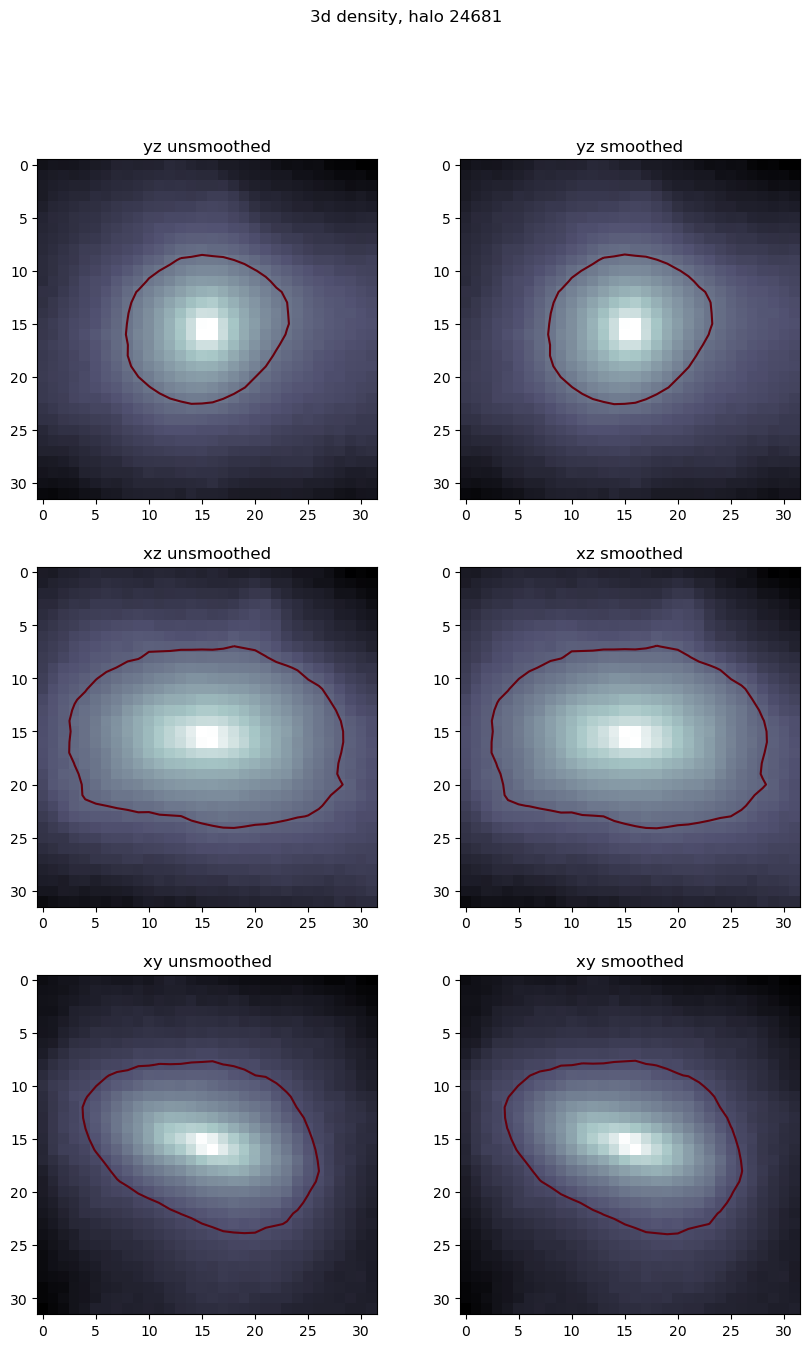

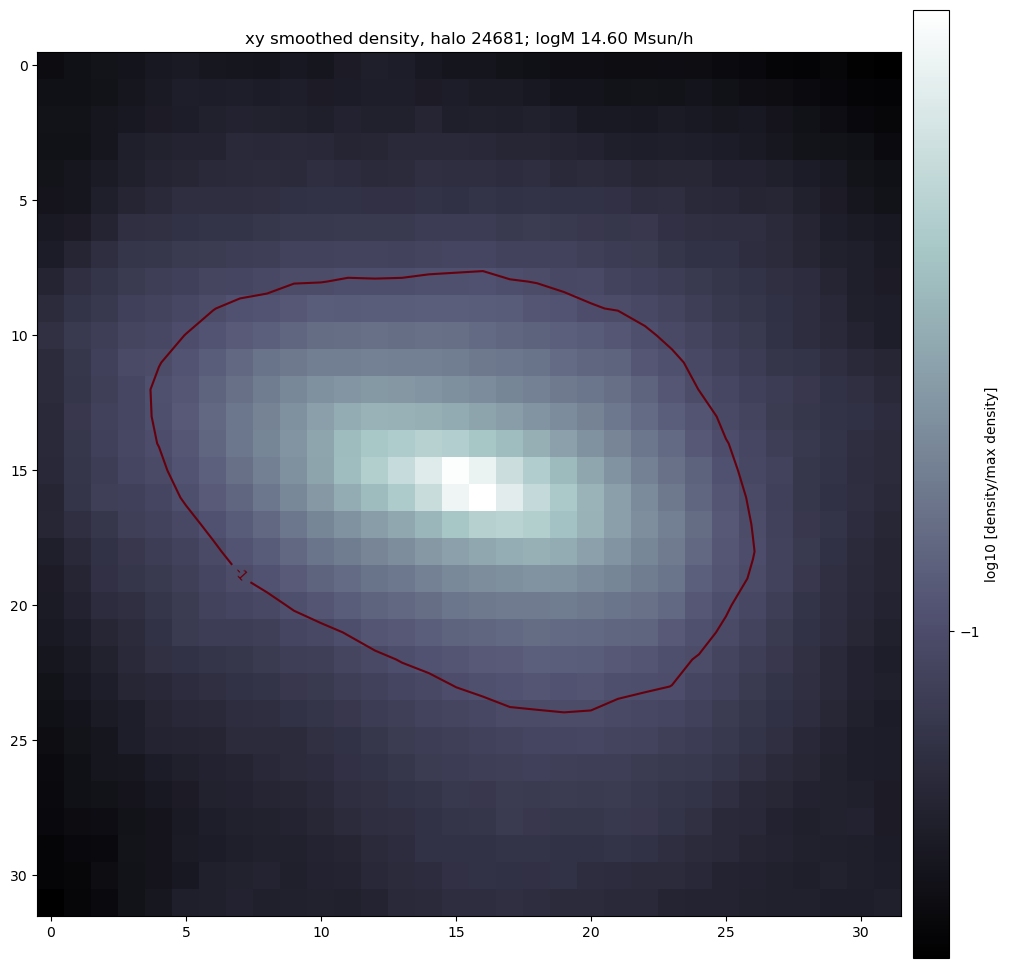

In [73]:
from utils.data.tng_query import HaloInfo

halo = HaloInfo(downloaded_halos[1])


dens = halo.make_3d_density(grid_bins=32)
halo._plot_3d_density(dens)


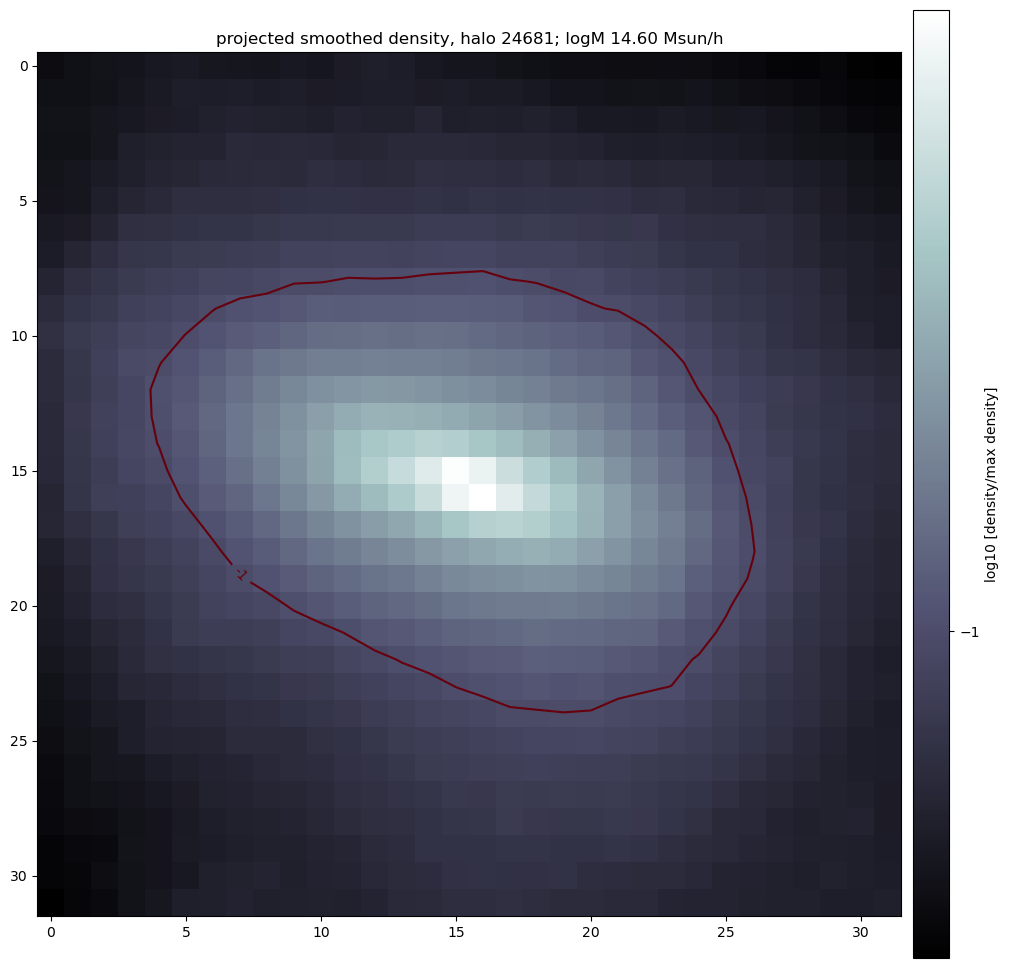

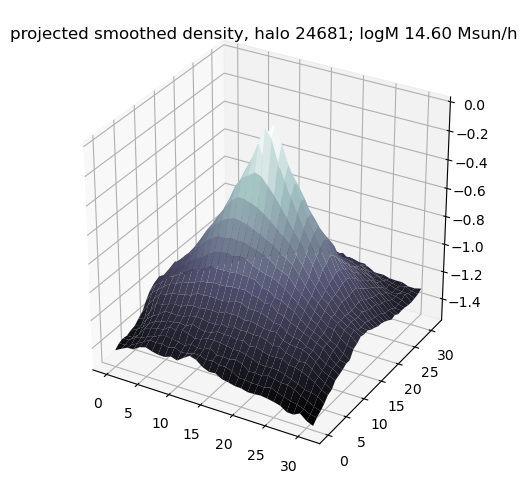

In [68]:

dens_2d = halo.make_2d_density(grid_bins=32)
halo._plot_2d_density(dens_2d)

halo._plot_2d_density_surface(dens_2d)


In [74]:
dens_new = dens['hist_smoothed'].astype(np.float16)

np.save(data_path[:-4]+'/tng_postprocess/dens_new.npy', dens_new)
np.save(data_path[:-4]+'/tng_postprocess/dens.npy', dens['hist_smoothed'])
#np.save(data_path[:-4]+'/tng_postprocess/dens.npy', dens['hist'])

In [75]:
16000*0.1

1600.0

In [72]:
dens['hist_smoothed'].shape

(64, 64, 64)